# Topic Modelling - Task 2

Topic modeling is one of the most powerful techniques in text mining for data mining, latent data discovery, and finding relationships among data and text documents. There are various methods for topic modelling, Latent Dirichlet Allocation (LDA) is one of the most popular in this field. However, there are other alternatives such as Hierarchical Dirichlet Process (HDP), which is an extension of LDA if the number of categories, or the boundaries, are not known in advance. Another model is Latent Semantic Indexing (LSI), it uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in an unstructured collection of text.

In this task, we are going to obtain the topics using the 3 models and choosing the best one at the end based on the topic coherence metric, which is a measure of how interpretable topics are for human beings; and visual interpretation. 

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
import nltk
import re
import spacy
from nltk import word_tokenize
from nltk.corpus import stopwords
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

Read the csv and define the auxiliar method to display the topics

In [100]:
def display_topics(model, model_type="lda"):
    for topic_idx, topic in enumerate(model.print_topics()):
        print ("Topic %d:" % (topic_idx))
        if model_type== "hdp":
            print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
        else:
            print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [113]:
df_es = pd.read_csv('ea_corpora_es_cleaned.csv', sep=',', header=0)
df_en = pd.read_csv('ea_corpora_en_cleaned.csv', sep=',', header=0)
df_fr = pd.read_csv('ea_corpora_fr_cleaned.csv', sep=',', header=0)

In [114]:
def remove_quotes(s):
    new_s = [x.strip(' \'') for x in s]
    return new_s

df_es['text_cleaned'] = df_es['text_cleaned'].apply(lambda x: remove_quotes(list(x[1:-1].split(','))))
df_en['text_cleaned'] = df_en['text_cleaned'].apply(lambda x: remove_quotes(list(x[1:-1].split(','))))
df_fr['text_cleaned'] = df_fr['text_cleaned'].apply(lambda x: remove_quotes(list(x[1:-1].split(','))))

### Spanish Topic Modelling

In [91]:
dictionary = Dictionary(df_es['text_cleaned'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus_es = [dictionary.doc2bow(text) for text in df_es['text_cleaned'].to_list()]

### Hierarchical Dirichlet process Model

In [95]:
hdpmodel = HdpModel(corpus=corpus_es, id2word=dictionary, random_state= 30)

In [96]:
display_topics(hdpmodel, model_type="hdp")

Topic 0:
ciudad  parte  categoria  nombre  embargo  tiempo  forma  grupo  guerra  vida 

Topic 1:
parte  tiempo  hombre  ciudad  nombre  categoria  mundo  vida  hombres  embargo 

Topic 2:
tiempo  ojos  parte  veces  hombre  vida  gente  hombres  noche  cosas 

Topic 3:
hombres  ciudad  parte  pueblo  camino  tiempo  luz  mujer  casa  hombre 

Topic 4:
espacio  hombre  cuerpo  idea  casa  distancia  cosas  veces  ojos  modo 

Topic 5:
tiempo  hijo  gente  pueblo  padre  cosas  hombres  vida  ojos  armas 

Topic 6:
ojos  tiempo  mujer  casa  vida  don  vez  hombre  padre  pueblo 

Topic 7:
hijo  tiempo  hombre  ojos  emperador  padre  vida  veces  casa  manos 

Topic 8:
corregidor  tiempo  casa  mujer  vida  indios  padre  parte  noche  pueblo 

Topic 9:
ojos  hombres  ciudad  hombre  padre  tiempo  mujer  voz  nombre  noche 

Topic 10:
familia  tierras  campos  ojos  padre  casa  febrer  barraca  hombre  mujer 

Topic 11:
vida  amor  mundo  hombre  hombres  habitantes  tiempo  ley  pal

### LSI Model

In [98]:
lsimodel = LsiModel(corpus=corpus_es, num_topics=10, id2word=dictionary)

In [99]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
ciudad guerra parte tiempo embargo nombre grupo fuerzas lugar hombres 

Topic 1:
ciudad guerra tiempo fuerzas tropas espacio batalla ejemplo hombre vida 

Topic 2:
ciudad guerra equipo fuerzas temporada partido tropas batalla ejercitos grupo 

Topic 3:
equipo ciudad guerra temporada jugadores fuerzas club partido jugador partidos 

Topic 4:
cortes texto conquista oro ciudad equipo guerra cosas espacio pueblos 

Topic 5:
cortes relatividad espacio padre texto hombre tiempo hijo vida campo 

Topic 6:
tiempo celulas album pulmon relatividad espacio ciudad viaje tratamiento campo 

Topic 7:
album celulas disco albumes personaje pulmon tintin banda aventuras serie 

Topic 8:
presidente celulas partido tiempo pulmon elecciones democracia album ciudad sistema 

Topic 9:
tiempo presidente viaje partido elecciones equipo celulas pulmon espiritu forma 



### Latent Dirichlet Allocation

In [92]:
ldamodel = LdaModel(corpus=corpus_es, num_topics=10, id2word=dictionary)

In [93]:
display_topics(ldamodel)

Topic 0:
vida agua forma especies veces tiempo parte hombre nombre hojas 

Topic 1:
presidente premios categoria partido arte obras obra parte actor actriz 

Topic 2:
equipo temporada jugador categoria campeonato partidos club partido puntos nombre 

Topic 3:
ciudad parte habitantes zona centro nombre ciudades guerra mar isla 

Topic 4:
futbolistas categoria equipo parte futbolista tour ciudad goles mundo partidos 

Topic 5:
color equipo division parte bandera categoria campo lugar aves animales 

Topic 6:
tiempo nombre lengua estrella embargo parte vida categoria hombres hombre 

Topic 7:
especies isla familia parte islas tiempo forma ciudad metros nombre 

Topic 8:
tipo forma ejemplo sistema uso datos embargo tiempo espacio parte 

Topic 9:
categoria parte grupo album guerra embargo disco banda hijo nombre 



### Coherence comparison between models

In [102]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [104]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_es['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_es['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_es['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

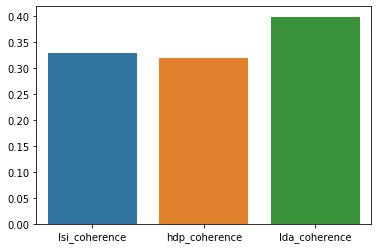

In [109]:
coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

We select the LDA model results

In [116]:
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, corpus=corpus_es, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

The topics in the spanish texts are:

    1) Nature
    2) Cinema
    3) A sport
    4) Human life in cities
    5) Football

### English Topic Modelling

In [117]:
dictionary = Dictionary(df_en['text_cleaned'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus_en = [dictionary.doc2bow(text) for text in df_en['text_cleaned'].to_list()]

### Hierarchical Dirichlet process Model

In [118]:
hdpmodel = HdpModel(corpus=corpus_en, id2word=dictionary, random_state= 30)

D:\Anaconda\envs\tf2_gpu\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [119]:
display_topics(hdpmodel, model_type="hdp")

Topic 0:
time  category  years  people  year  number  world  life  part  city 

Topic 1:
time  people  love  man  text  life  years  shift  eyes  day 

Topic 2:
history  time  law  book  man  heart  author  characters  work  life 

Topic 3:
book  amp  list  uids  time  cell  years  love  ndash  life 

Topic 4:
time  money  music  book  film  man  years  album  rock  love 

Topic 5:
film  time  story  book  days  years  opium  work  girl  life 

Topic 6:
time  book  people  life  film  eyes  land  words  sea  island 

Topic 7:
time  years  film  music  story  book  love  work  style  family 

Topic 8:
book  time  people  love  pulsatility  action  story  film  life  years 

Topic 9:
album  book  film  rock  music  time  group  life  songs  voice 

Topic 10:
film  book  time  relations  life  people  action  story  work  cases 

Topic 11:
film  time  book  life  story  characters  history  years  season  world 

Topic 12:
book  time  story  teacher  history  years  author  people  film  

### LSI Model

In [120]:
lsimodel = LsiModel(corpus=corpus_en, num_topics=10, id2word=dictionary)

In [121]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
time years people category year number world city music history 

Topic 1:
water team season game players player music games power time 

Topic 2:
music water team nbsp season band game players player metal 

Topic 3:
water music band metal city government people century uranium war 

Topic 4:
nbsp water season power music uranium number team system metal 

Topic 5:
city area music man population time life metal government band 

Topic 6:
nbsp power wind water engine energy heat season pieces city 

Topic 7:
uranium metal water language system software number weapons season war 

Topic 8:
film metal nbsp films city band movie television players director 

Topic 9:
wind nbsp uranium power language film software energy source system 



### Latent Dirichlet Allocation

In [122]:
ldamodel = LdaModel(corpus=corpus_en, num_topics=10, id2word=dictionary)

In [123]:
display_topics(ldamodel)

Topic 0:
table player war category spin players year campaign opponent operations 

Topic 1:
groups season body cities areas election period service surface members 

Topic 2:
government time people area population city category century number years 

Topic 3:
category time language years state church people words world system 

Topic 4:
team players film scale server division independence director nbsp cell 

Topic 5:
music category band songs song languages project year jazz album 

Topic 6:
category town barrier occupation contact strike family commander destination reef 

Topic 7:
species life years members power system century history region year 

Topic 8:
film category films fish time roots water role software ice 

Topic 9:
organizations groups awards transfer tracks bands bodies translation extension recordings 



### Coherence comparison between models

In [124]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [125]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_en['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_en['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_en['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

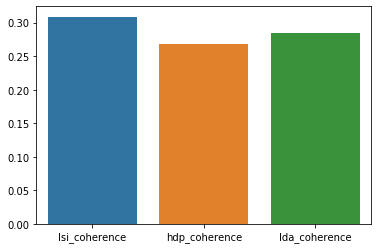

In [126]:
coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

We select the LDA model results

In [127]:
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, corpus=corpus_en, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

The topics in the english texts are:

    1) War
    2) Democracy
    3) A government history
    4) Country system
    5) Music

### French Topic Modelling

In [130]:
dictionary = Dictionary(df_fr['text_cleaned'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus_fr = [dictionary.doc2bow(text) for text in df_fr['text_cleaned'].to_list()]

### Hierarchical Dirichlet process Model

In [131]:
hdpmodel = HdpModel(corpus=corpus_fr, id2word=dictionary, random_state= 30)

D:\Anaconda\envs\tf2_gpu\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [132]:
display_topics(hdpmodel, model_type="hdp")

Topic 0:
categorie  ville  nom  guerre  partie  ans  site  groupe  annees  pays 

Topic 1:
categorie  groupe  nom  syst  exemple  forme  tre  album  frac  nombre 

Topic 2:
categorie  frac  nombre  fonction  film  ville  album  zeta  nombres  partie 

Topic 3:
tour  categorie  film  album  eeeeee  coupe  football  groupe  histoire  monde 

Topic 4:
categorie  film  femme  vie  tre  histoire  cours  ville  bataille  nom 

Topic 5:
base  registre  vitesse  lumi  iguanodon  categorie  syst  eau  cano  film 

Topic 6:
jeux  categorie  jeu  thon  hertz  qualite  film  annees  tre  equipe 

Topic 7:
eau  amp  categorie  album  film  fusion  ville  graines  forme  cycle 

Topic 8:
duche  pairie  thinsp  ville  cre  titre  typhus  categorie  district  guerre 

Topic 9:
album  art  livre  film  tre  aspis  histoire  epoque  fois  annees 

Topic 10:
categorie  livre  fabrication  production  zastava  nom  bataille  usine  armee  ans 

Topic 11:
arc  tour  arcs  corde  etape  archer  guerre  cate

### LSI Model

In [133]:
lsimodel = LsiModel(corpus=corpus_fr, num_topics=10, id2word=dictionary)

In [134]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
ville bar guerre partie site pays histoire annees ans nom 

Topic 1:
bar ville site till guerre text essonnes commune centre pays 

Topic 2:
famille ordre apg football bar guerre equipe coupe joueurs classification 

Topic 3:
football ville equipe coupe joueurs match guerre tournoi saison clubs 

Topic 4:
ville bar football groupe tre puissance vie volonte homme album 

Topic 5:
guerre ville bar groupe football album cit armee categorie gouvernement 

Topic 6:
groupe album football categorie guerre film puissance musique volonte tre 

Topic 7:
football tour tournoi groupe album clubs equipe saison annees categorie 

Topic 8:
energie football eau ville pays guerre frac gouvernement histoire vie 

Topic 9:
synagogue ordre guerre synagogues energie eau histoire frac gouvernement gouverneur 



### Latent Dirichlet Allocation

In [135]:
ldamodel = LdaModel(corpus=corpus_fr, num_topics=10, id2word=dictionary)

In [136]:
display_topics(ldamodel)

Topic 0:
club tats eeeeee orchestre malaisie cap cour annees coupe categorie 

Topic 1:
categorie football joueurs famille equipe musee ans naissance villes sport 

Topic 2:
film habitants tour juillet balle gouvernement image categorie guerre etape 

Topic 3:
tats joueur travaux mars serie coupe site novembre saison groupe 

Topic 4:
ville tour eau comte lieu nom site mai match region 

Topic 5:
site uvres syst territoire ligne region nord zones guerre partie 

Topic 6:
tat pays poissons guerre ordre president glise tennis ref ministre 

Topic 7:
categorie bar naissance equipe till competition text medaille poissons histoire 

Topic 8:
categorie groupe nom album ans fils annees roi vie musique 

Topic 9:
art exemple partie cas nombre activite point tre unite production 



### Coherence comparison between models

In [137]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [138]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_fr['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_fr['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_fr['text_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

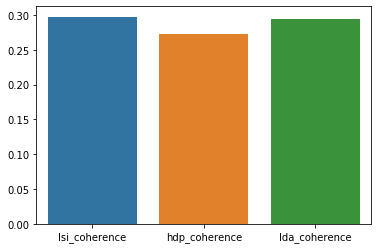

In [139]:
coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

We select the LDA model results

In [141]:
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, corpus=corpus_fr, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

The topics in the french texts are:

    1) Music
    2) Sports
    3) Governments
    4) Jobs
    5) Geography